In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/navneet-nmk/Indian-Crime-Data/master/crime_data.csv')
data.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [3]:
data["Rape"] = data["Rape"] + data["Custodial Rape"] + data["Custodial_Gang Rape"]
drop_tables = ["Custodial_Gang Rape", "Custodial Rape", "Rape other than Custodial"]
data = data.drop(drop_tables, axis=1)

In [4]:
data.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial_Other Rape,Rape_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,1,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [5]:
data_states = data["States/UTs"].unique()
murder_by_state={}
for state in data_states:
    data_state = data[data["States/UTs"] == state]
    total_murder = data_state["Murder"].sum()
    murder_by_state[state] = total_murder
print(murder_by_state)

{'Andhra Pradesh': 2350, 'Arunachal Pradesh': 172, 'Assam': 2902, 'Bihar': 6806, 'Chhattisgarh': 1996, 'Goa': 68, 'Gujarat': 2248, 'Haryana': 2212, 'Himachal Pradesh': 260, 'Jammu & Kashmir': 312, 'Jharkhand': 3316, 'Karnataka': 3272, 'Kerala': 734, 'Madhya Pradesh': 4548, 'Maharashtra': 5340, 'Manipur': 192, 'Meghalaya': 318, 'Mizoram': 84, 'Nagaland': 116, 'Odisha': 2900, 'Punjab': 1534, 'Rajasthan': 3274, 'Sikkim': 24, 'Tamil Nadu': 3610, 'Telangana': 2616, 'Tripura': 280, 'Uttar Pradesh': 10300, 'Uttarakhand': 436, 'West Bengal': 4740, 'A&N Islands': 16, 'Chandigarh': 48, 'D&N Haveli': 8, 'Daman & Diu': 14, 'Delhi UT': 1172, 'Lakshadweep': 0, 'Puducherry': 50}


In [6]:
new_table = data.pivot_table(index="States/UTs", values="Murder",aggfunc=np.std)
print(new_table)

                       Murder
States/UTs                   
A&N Islands          3.162278
Andhra Pradesh     246.113166
Arunachal Pradesh   18.599377
Assam              261.238661
Bihar              488.862506
Chandigarh           0.000000
Chhattisgarh       179.626213
D&N Haveli           0.000000
Daman & Diu          3.214550
Delhi UT           127.905146
Goa                 14.094916
Gujarat            170.149180
Haryana            213.522466
Himachal Pradesh    31.118055
Jammu & Kashmir     27.581317
Jharkhand          309.212652
Karnataka          264.211567
Kerala              75.021613
Lakshadweep          0.000000
Madhya Pradesh     299.304267
Maharashtra        382.899893
Manipur             26.699677
Meghalaya           42.391037
Mizoram             12.393547
Nagaland            16.461157
Odisha             232.851330
Puducherry           9.712535
Punjab             138.062446
Rajasthan          244.705613
Sikkim               4.690416
Tamil Nadu         270.446716
Telangana 

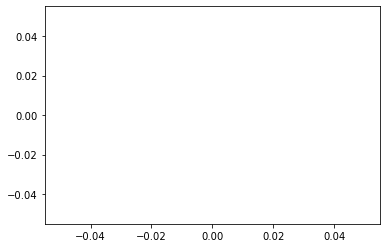

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot()
plt.show()

In [9]:
x_values = new_table.index
print(x_values)

Index(['A&N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='States/UTs')


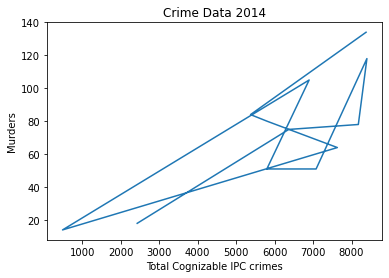

In [10]:
x_values = data["Total Cognizable IPC crimes"].head(12)
y_values = data["Murder"].head(12)
plt.plot(x_values, y_values)
plt.xlabel("Total Cognizable IPC crimes")
plt.ylabel("Murders")
plt.title("Crime Data 2014")
plt.show()

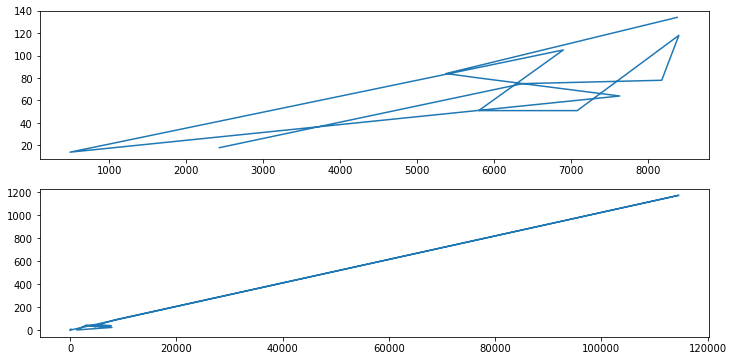

In [11]:
x_b_values = data["Total Cognizable IPC crimes"].iloc[12:24]
y_b_values = data["Murder"].iloc[12:24]
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(x_values,y_values)
ax2.plot(x_b_values,y_b_values)
plt.plot()
plt.show()

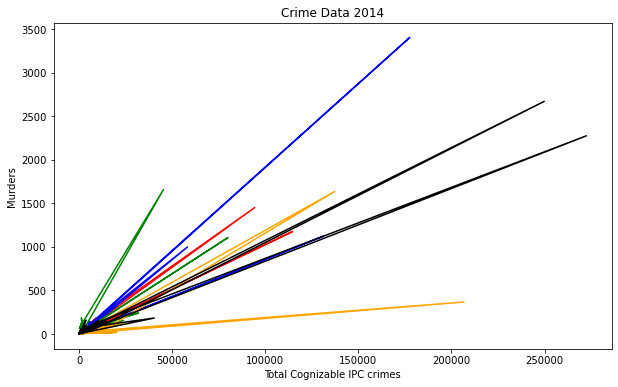

In [12]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*100
    end_index = (i+1)*100
    x_values = data["Total Cognizable IPC crimes"].iloc[start_index:end_index]
    y_values = data["Murder"].iloc[start_index:end_index]
    plt.plot(x_values,y_values,c=colors[i])
plt.xlabel("Total Cognizable IPC crimes")
plt.ylabel("Murders")
plt.title("Crime Data 2014")
plt.show()

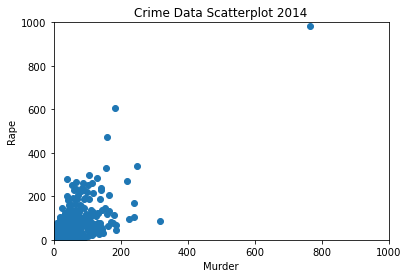

In [16]:
fig, ax = plt.subplots()
ax.scatter(data["Murder"], data["Rape"])
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.title("Crime Data Scatterplot 2014")
plt.show()

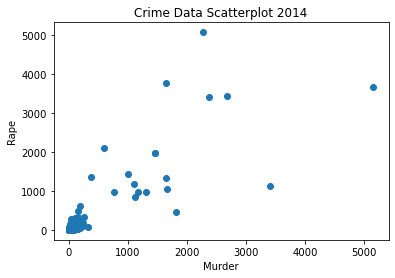

In [15]:
fig, ax = plt.subplots()
ax.scatter(data["Murder"], data["Rape"])
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.title("Crime Data Scatterplot 2014")
plt.show()